# Netflix Veri Analizi

Bu notebook, Netflix içeriklerinin detaylı analizini içermektedir.

In [2]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Görselleştirme ayarları
plt.style.use('default')  # Varsayılan stil kullanılıyor
sns.set_theme()  # Seaborn teması ayarlanıyor
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Veri setini yükleme
df = pd.read_csv('netflix_titles.csv')

# Veri setinin boyutunu kontrol etme
print(f"Veri seti boyutu: {df.shape}")

# İlk 5 satırı görüntüleme
df.head()

Veri seti boyutu: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Eksik değerlerin kontrolü
print("Eksik değerler:")
df.isnull().sum()

# Veri tiplerinin kontrolü
print("\nVeri tipleri:")
df.info()

# Tarih sütunlarını datetime formatına çevirme
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

Eksik değerler:

Veri tipleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


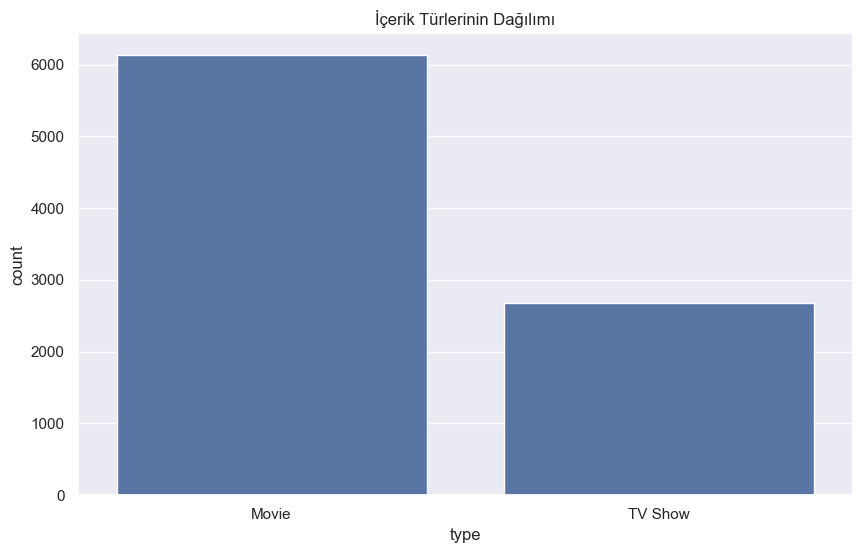

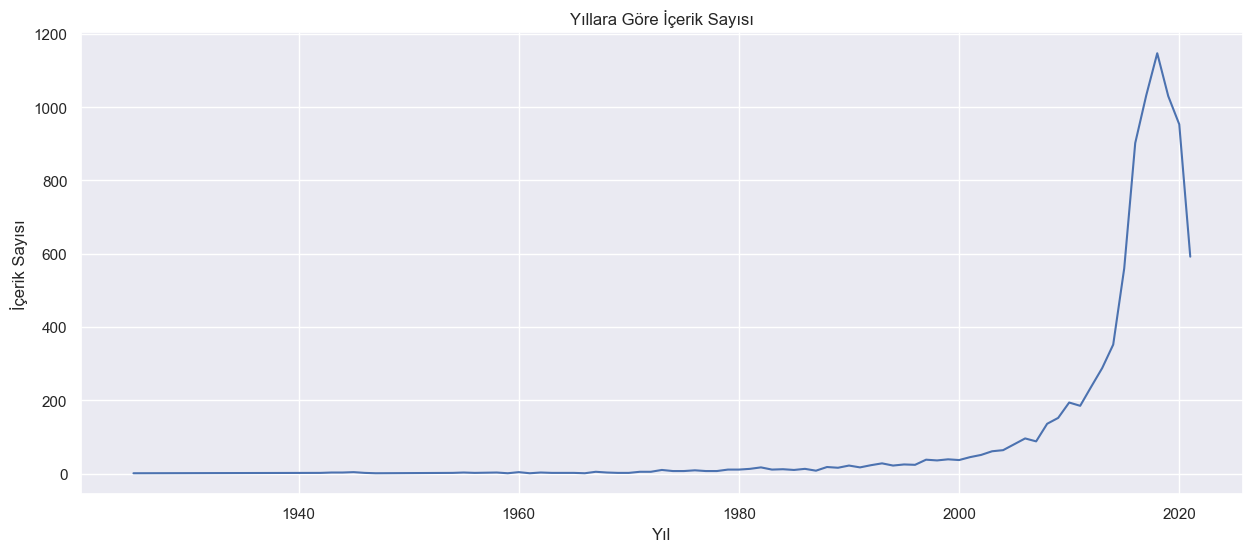

In [8]:
# İçerik türlerinin dağılımı
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.title('İçerik Türlerinin Dağılımı')
plt.show()

# Yıllara göre içerik sayısı
plt.figure(figsize=(15,6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Yıllara Göre İçerik Sayısı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.grid(True)
plt.show()

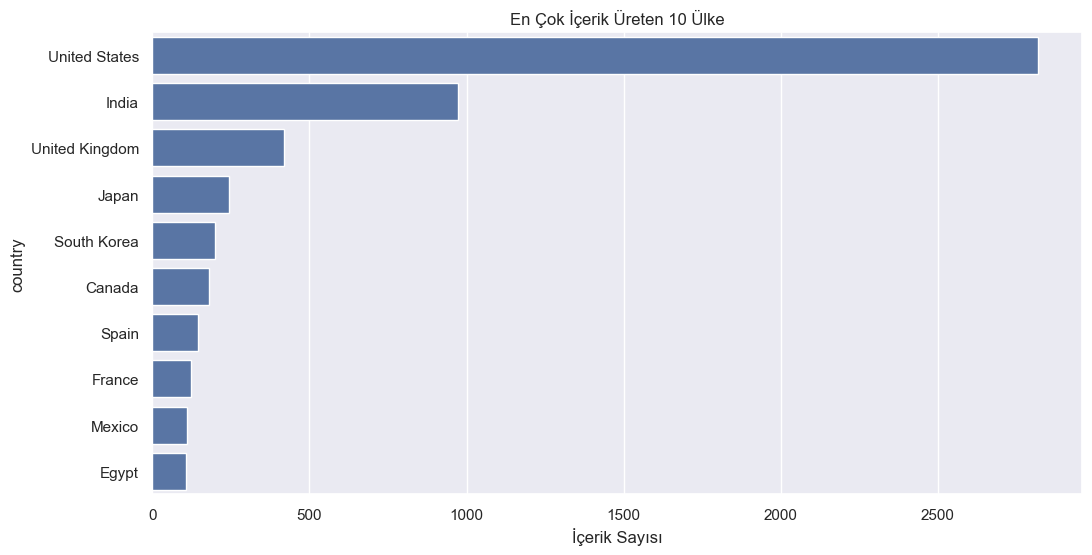

In [9]:
# En çok içerik üreten ülkeler
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('En Çok İçerik Üreten 10 Ülke')
plt.xlabel('İçerik Sayısı')
plt.show()

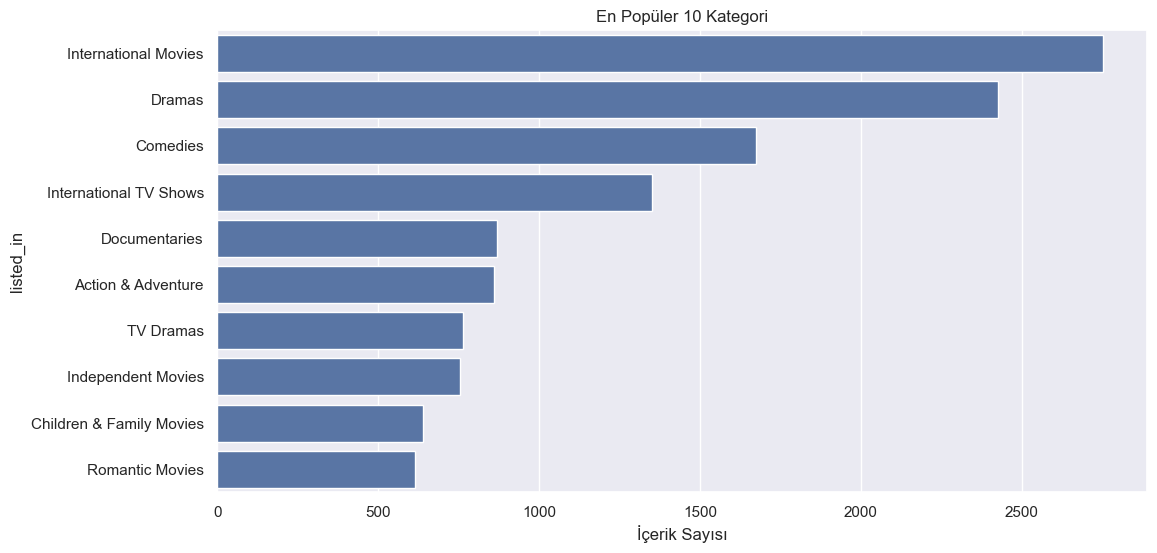

In [10]:
# En popüler kategoriler
categories = df['listed_in'].str.split(', ').explode()
category_counts = categories.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('En Popüler 10 Kategori')
plt.xlabel('İçerik Sayısı')
plt.show()

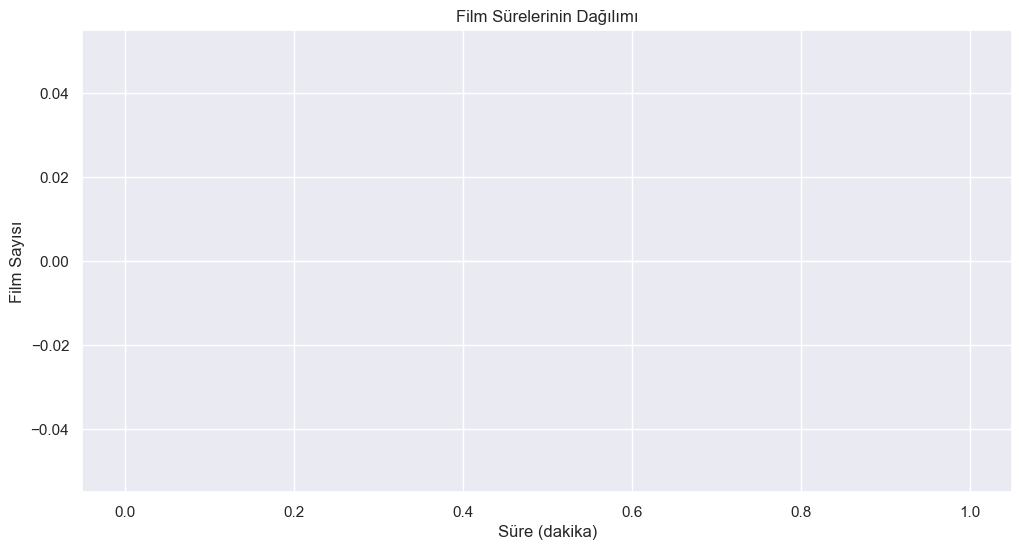

In [12]:
# Film sürelerinin dağılımı
movies = df[df['type'] == 'Movie'].copy()  # DataFrame'in bir kopyasını oluştur
movies.loc[:, 'duration'] = movies['duration'].str.extract(r'(\\d+)').astype(float)  # r-string kullan ve .loc ile atama yap

plt.figure(figsize=(12,6))
sns.histplot(data=movies, x='duration', bins=30)
plt.title('Film Sürelerinin Dağılımı')
plt.xlabel('Süre (dakika)')
plt.ylabel('Film Sayısı')
plt.show()

## Sonuçlar ve Öneriler

Bu analiz sonucunda elde edilen önemli bulgular:

1. İçerik türlerinin dağılımı
2. Yıllara göre içerik üretim trendi
3. En aktif ülkeler
4. Popüler kategoriler
5. Film sürelerinin dağılımı

Bu veriler ışığında Netflix'in içerik stratejisi hakkında önemli çıkarımlar yapılabilir.